In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
from google.colab import files
dataset = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [4]:
data = pd.read_csv("Titanic-Dataset.csv")

In [5]:
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [22]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [23]:
mean_age = data['Age'].mean()
data['Age'].fillna(mean_age, inplace=True)

In [24]:
most_frequent_embarked = data['Embarked'].mode()[0]
data['Embarked'].fillna(most_frequent_embarked, inplace=True)

In [25]:
data.drop('Cabin', axis=1, inplace=True)

In [26]:
print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [27]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [28]:
data['Title'] = data['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [29]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, "Col": 7, "Major": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10, "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
data['Title'] = data['Title'].map(title_mapping)

In [30]:
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [32]:
print(data.head())

   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500         1           0   
1         1       1  38.0      1      0  71.2833         0           0   
2         1       3  26.0      0      0   7.9250         0           0   
3         1       1  35.0      1      0  53.1000         0           0   
4         0       3  35.0      0      0   8.0500         1           0   

   Embarked_S  Title  
0           1    1.0  
1           0    3.0  
2           1    2.0  
3           1    3.0  
4           1    1.0  


In [33]:
print(data.isnull().sum())

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Title         1
dtype: int64


In [34]:
import warnings
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
warnings.simplefilter(action='ignore', category=FutureWarning)

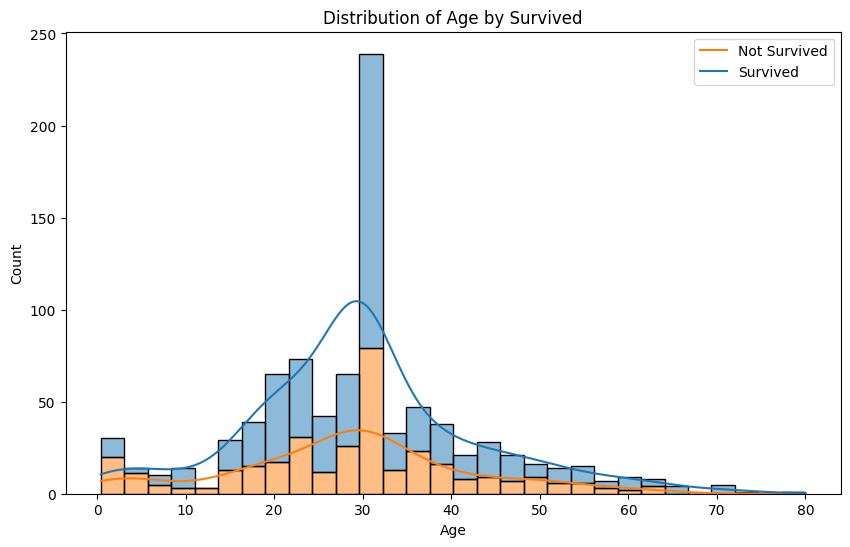

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', bins=30, kde=True, hue='Survived', multiple='stack')
plt.title('Distribution of Age by Survived')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

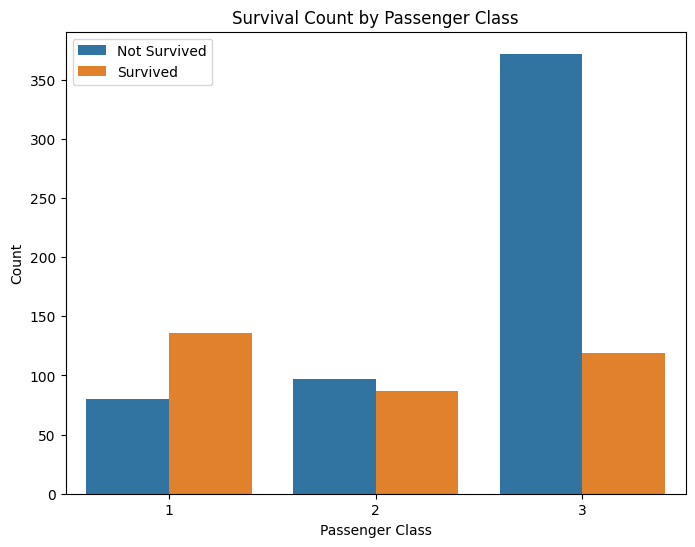

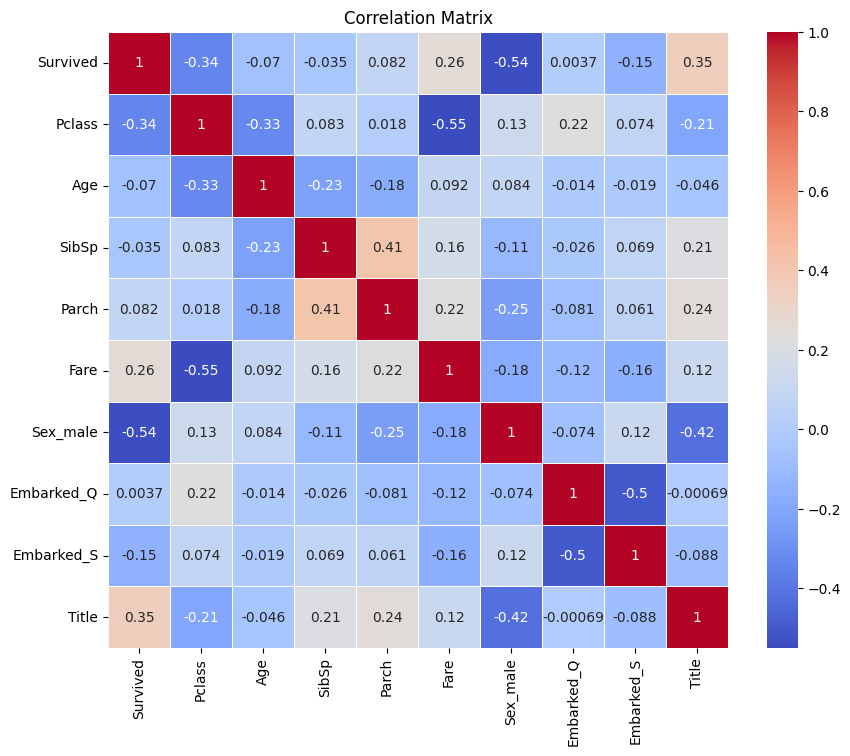

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(['Not Survived', 'Survived'])
plt.show()

# Explore correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

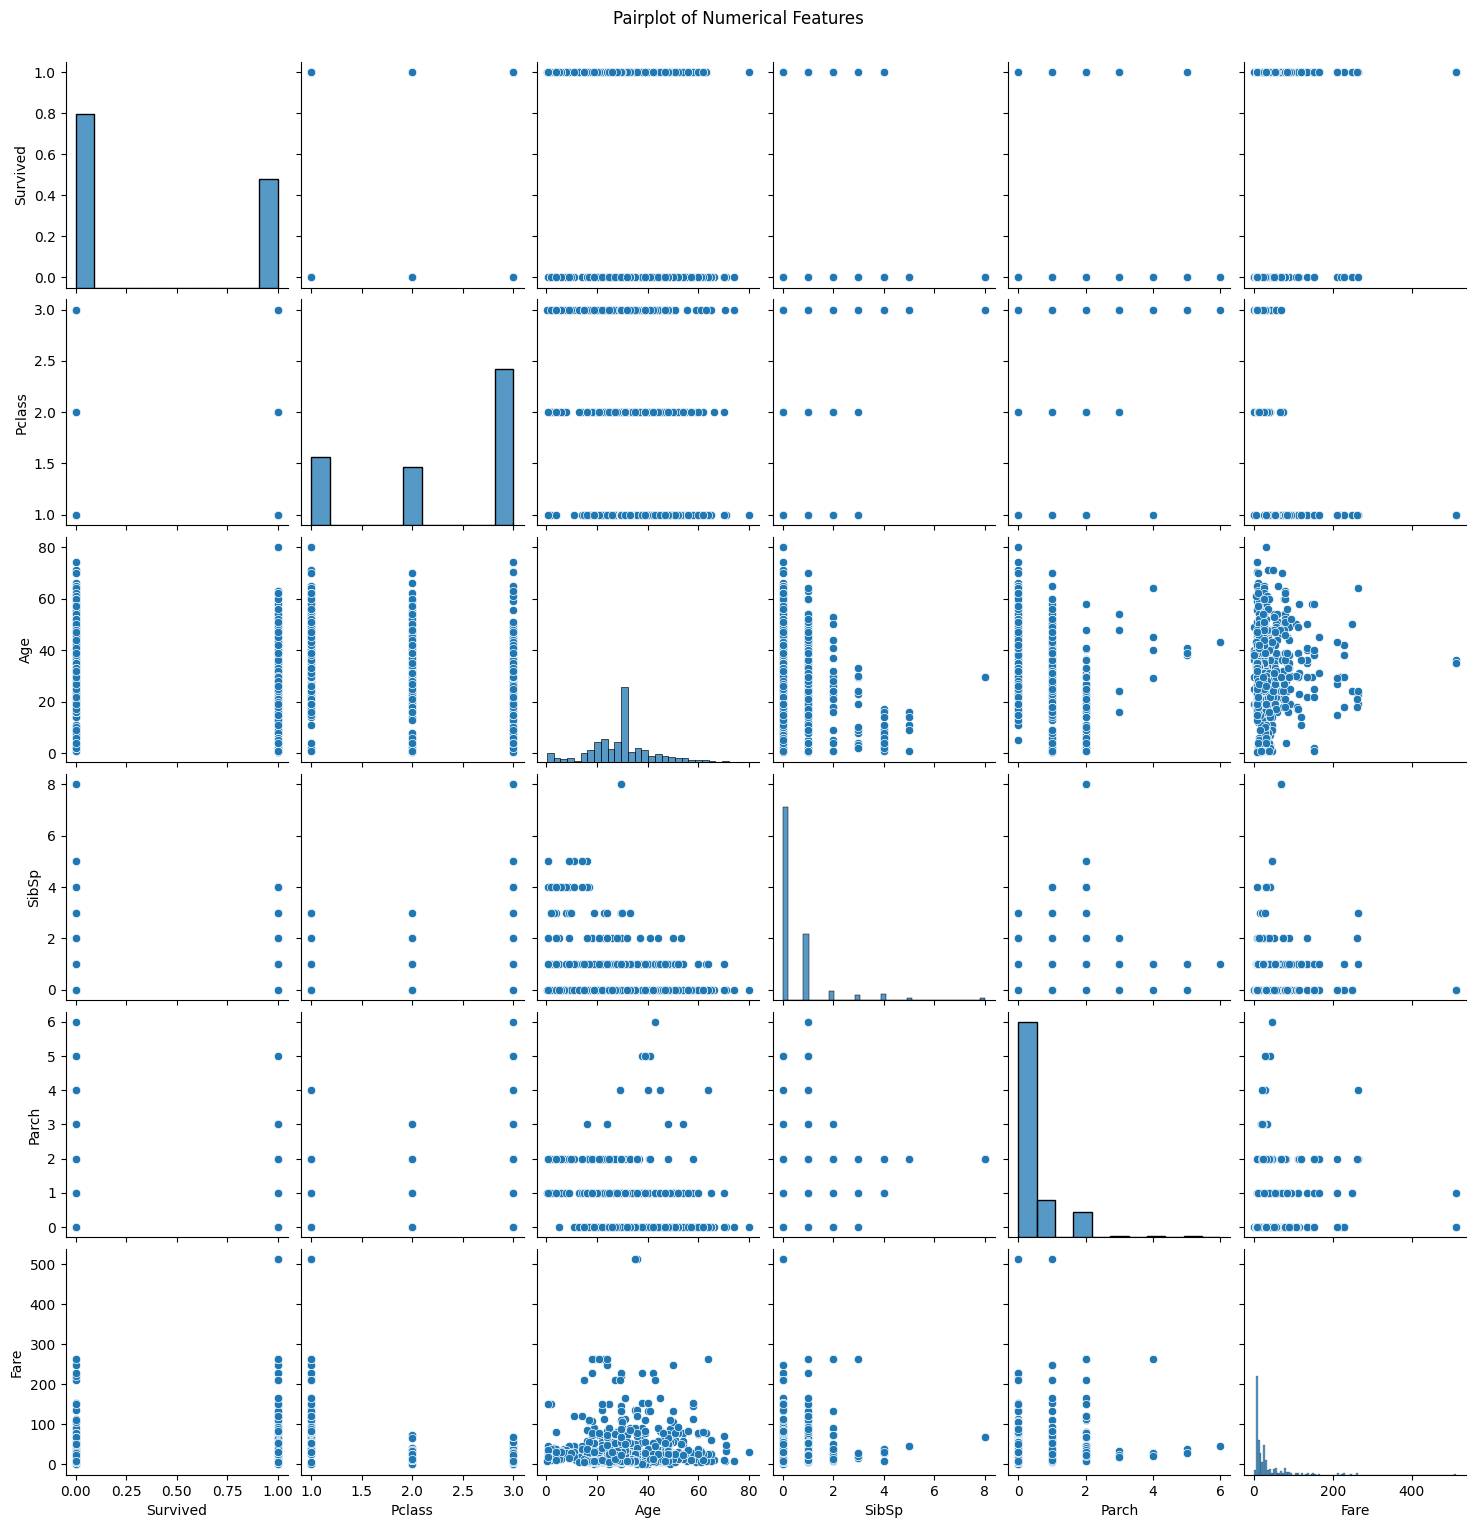

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

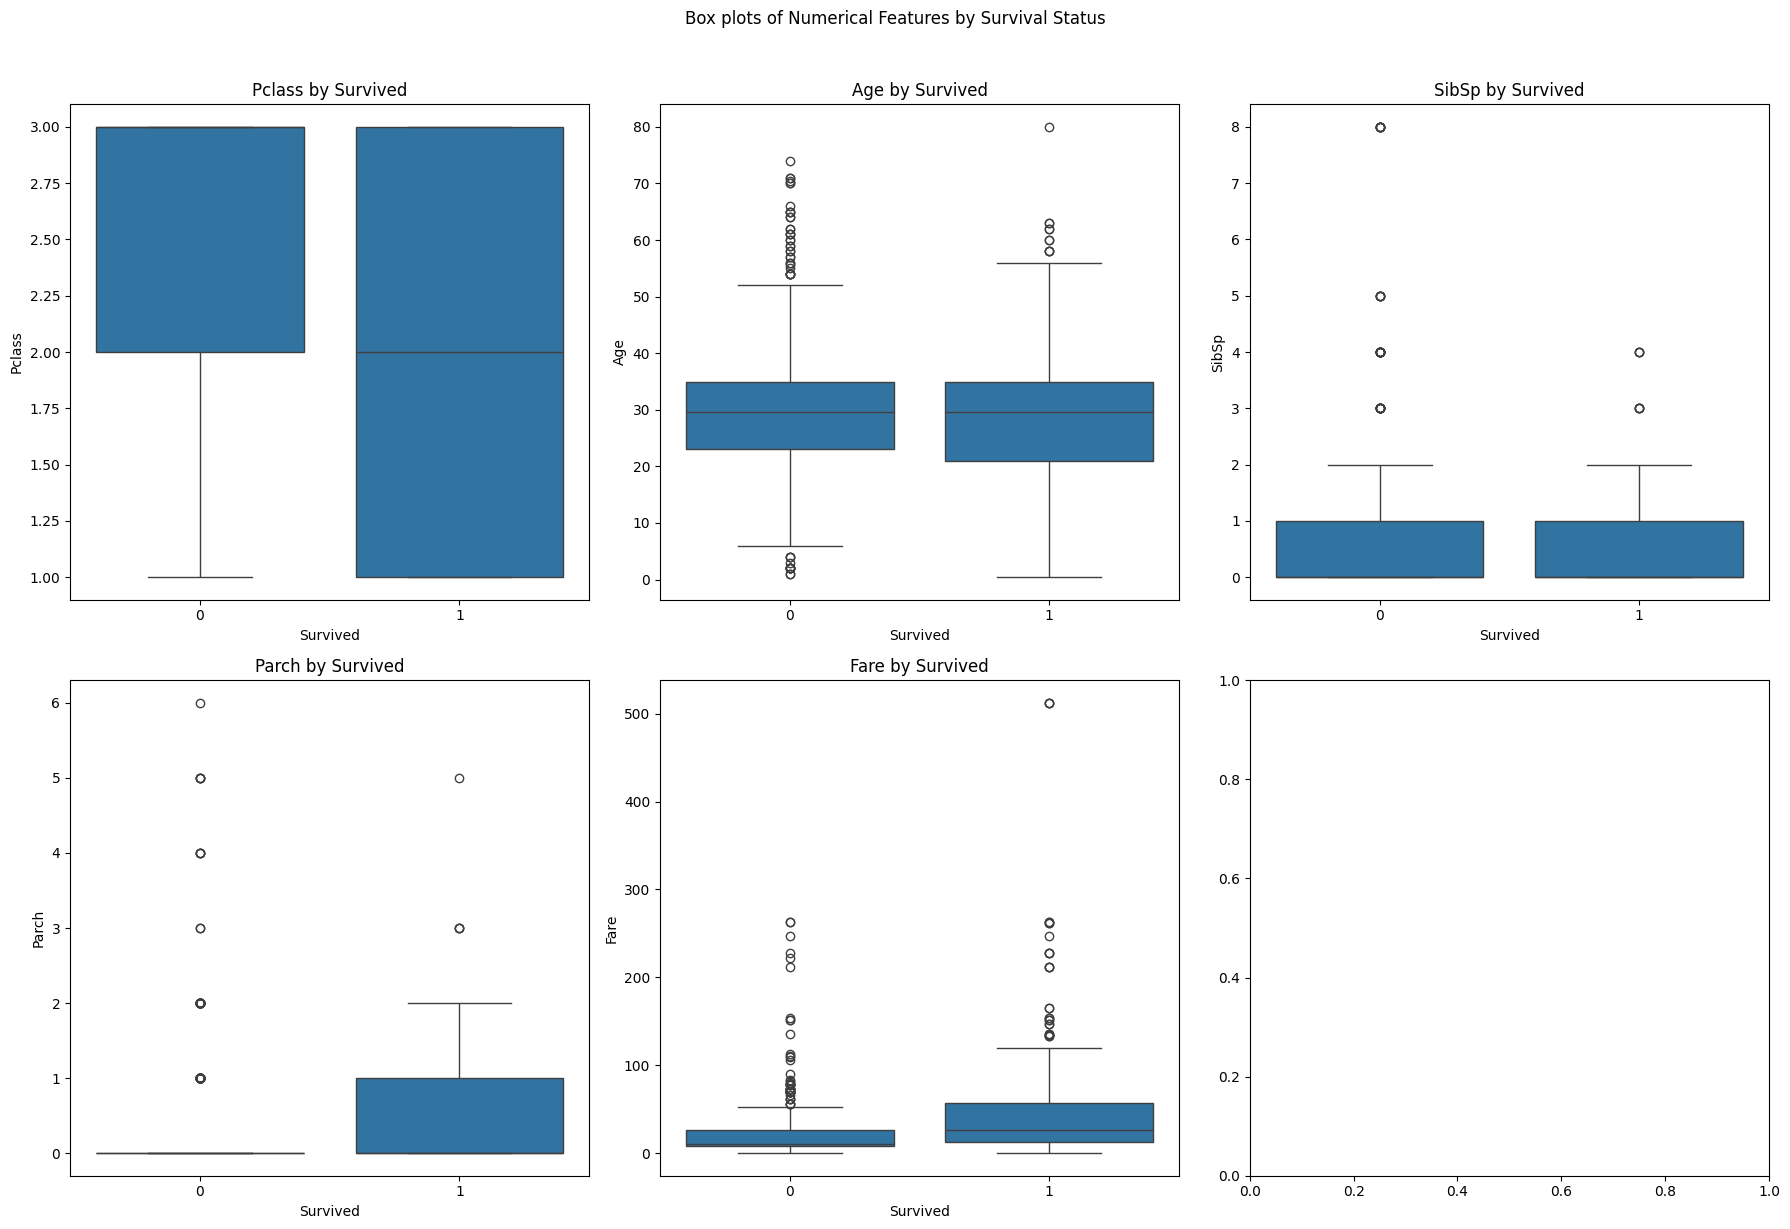

In [39]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
for i, col in enumerate(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']):
    sns.boxplot(x='Survived', y=col, data=data, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f'{col} by Survived')
plt.suptitle('Box plots of Numerical Features by Survival Status', y=1.02)
plt.tight_layout()
plt.show()

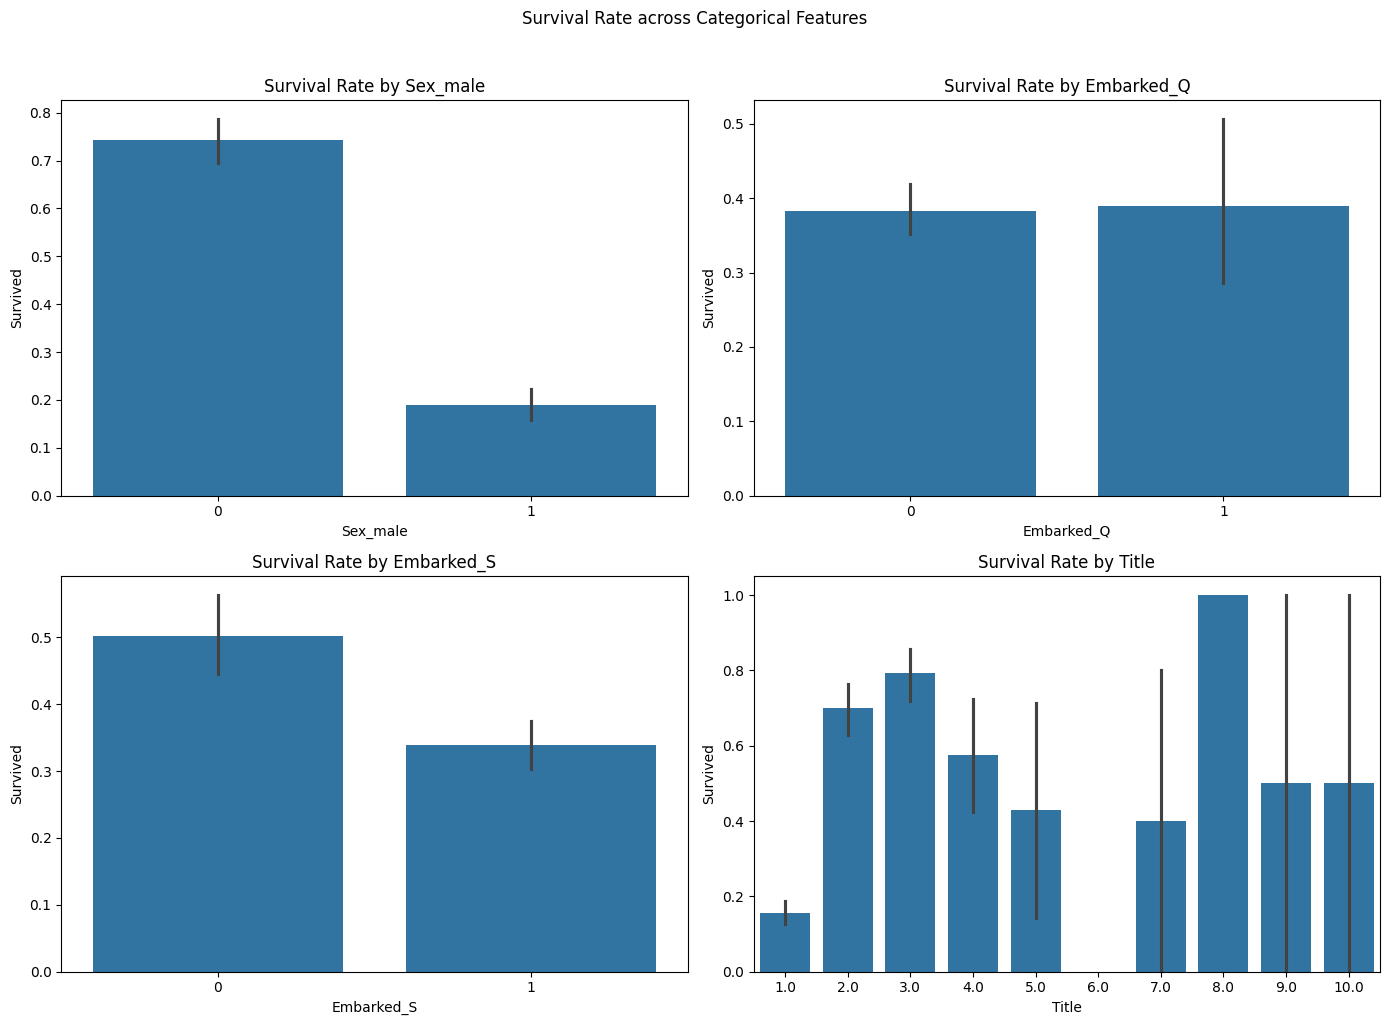

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for i, col in enumerate(['Sex_male', 'Embarked_Q', 'Embarked_S', 'Title']):
    sns.barplot(x=col, y='Survived', data=data, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Survival Rate by {col}')
plt.suptitle('Survival Rate across Categorical Features', y=1.02)
plt.tight_layout()
plt.show()

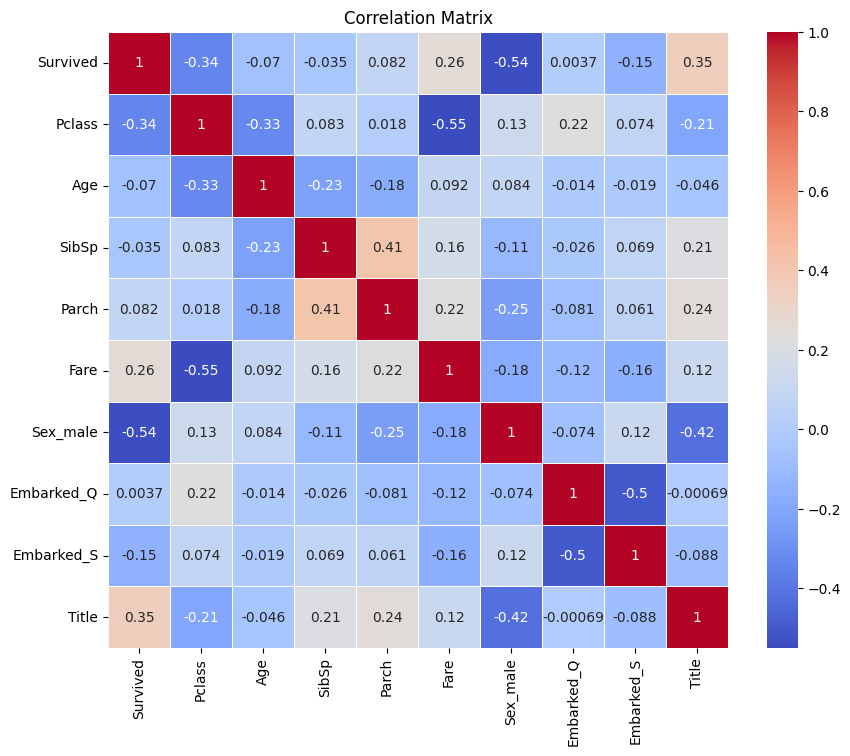

In [42]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [43]:
missing_values = data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Title         1
dtype: int64


In [45]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Title'].fillna(data['Title'].mode()[0], inplace=True)

In [46]:
mode_title = data['Title'].mode()[0]
data['Title'].fillna(mode_title, inplace=True)

In [47]:
missing_values = data.isnull().sum()
print("Missing values in the dataset:")
print(missing_values)

Missing values in the dataset:
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Title         0
dtype: int64


In [48]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


In [51]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [52]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

In [53]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

rf_clf.fit(X_imputed, y)

feature_importances = rf_clf.feature_importances_

selector = SelectFromModel(rf_clf, threshold=0.05)
selector.fit(X_imputed, y)

selected_features_indices = selector.get_support(indices=True)

selected_features_names = X.columns[selected_features_indices]

print("Selected Features:")
print(selected_features_names)

Selected Features:
Index(['Pclass', 'Age', 'SibSp', 'Fare', 'Sex_male', 'Title'], dtype='object')


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[selected_features_names], y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (712, 6)
Shape of X_test: (179, 6)
Shape of y_train: (712,)
Shape of y_test: (179,)


In [57]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [59]:
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gb_clf.fit(X_train, y_train)

y_pred_gb = gb_clf.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy of Gradient Boosting:", accuracy_gb)

Accuracy of Gradient Boosting: 0.8268156424581006


In [60]:
print("Classification Report of Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))

Classification Report of Gradient Boosting:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



In [61]:
print("Confusion Matrix of Gradient Boosting:")
print(confusion_matrix(y_test, y_pred_gb))

Confusion Matrix of Gradient Boosting:
[[94 11]
 [20 54]]


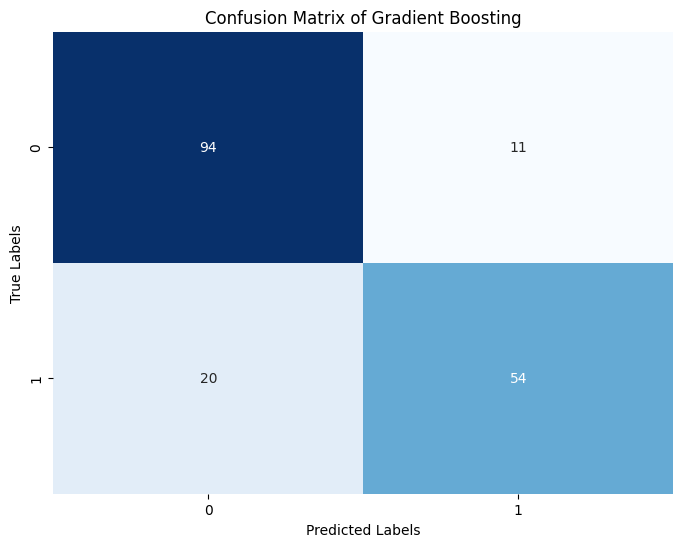

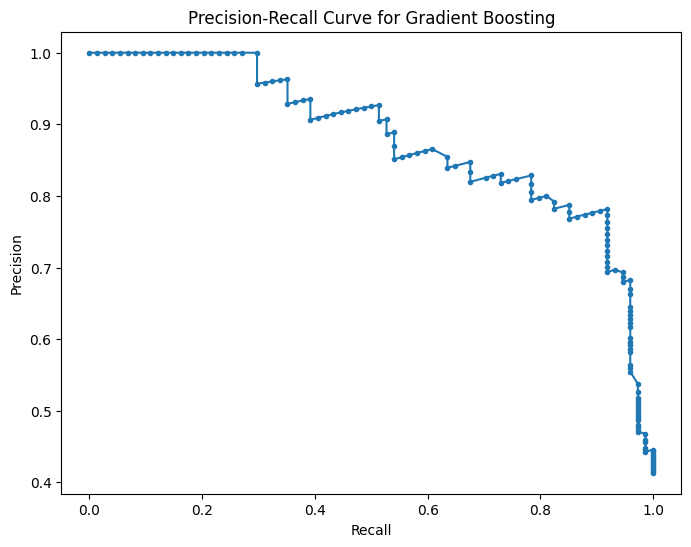

In [62]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Gradient Boosting')
plt.show()

from sklearn.metrics import precision_recall_curve

precision_gb, recall_gb, _ = precision_recall_curve(y_test, gb_clf.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall_gb, precision_gb, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting')
plt.show()

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train, y_train)

y_pred_gb = gradient_boosting_model.predict(X_test)

accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)

print("Evaluation metrics for Gradient Boosting:")
print(f"Accuracy: {accuracy_gb:.2f}")
print(f"Precision: {precision_gb:.2f}")
print(f"Recall: {recall_gb:.2f}")
print(f"F1-score: {f1_gb:.2f}")
print(f"ROC-AUC: {roc_auc_gb:.2f}")

Evaluation metrics for Gradient Boosting:
Accuracy: 0.83
Precision: 0.83
Recall: 0.73
F1-score: 0.78
ROC-AUC: 0.81


In [64]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gradient_boosting = GradientBoostingClassifier()

grid_search = GridSearchCV(gradient_boosting, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred_best = best_model.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_pred_best)

print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy_best)
print("Precision:", precision_best)
print("Recall:", recall_best)
print("F1-score:", f1_best)
print("ROC-AUC:", roc_auc_best)

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}
Accuracy: 0.8324022346368715
Precision: 0.8333333333333334
Recall: 0.7432432432432432
F1-score: 0.7857142857142858
ROC-AUC: 0.8192406692406693


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X[selected_features_names], y, test_size=0.2, random_state=42)

initial_gb_model = GradientBoostingClassifier()
initial_gb_model.fit(X_train, y_train)

initial_predictions = initial_gb_model.predict(X_test)
initial_accuracy = accuracy_score(y_test, initial_predictions)
initial_precision = precision_score(y_test, initial_predictions)
initial_recall = recall_score(y_test, initial_predictions)
initial_f1 = f1_score(y_test, initial_predictions)
initial_roc_auc = roc_auc_score(y_test, initial_predictions)

print("Initial Evaluation metrics for Gradient Boosting:")
print(f"Accuracy: {initial_accuracy}")
print(f"Precision: {initial_precision}")
print(f"Recall: {initial_recall}")
print(f"F1-score: {initial_f1}")
print(f"ROC-AUC: {initial_roc_auc}")


Initial Evaluation metrics for Gradient Boosting:
Accuracy: 0.8268156424581006
Precision: 0.8307692307692308
Recall: 0.7297297297297297
F1-score: 0.7769784172661871
ROC-AUC: 0.8124839124839125


In [66]:
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_gb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)
best_predictions = best_gb_model.predict(X_test)
best_accuracy = accuracy_score(y_test, best_predictions)
best_precision = precision_score(y_test, best_predictions)
best_recall = recall_score(y_test, best_predictions)
best_f1 = f1_score(y_test, best_predictions)
best_roc_auc = roc_auc_score(y_test, best_predictions)

print("Evaluation metrics for Gradient Boosting after hyperparameter tuning:")
print(f"Accuracy: {best_accuracy}")
print(f"Precision: {best_precision}")
print(f"Recall: {best_recall}")
print(f"F1-score: {best_f1}")
print(f"ROC-AUC: {best_roc_auc}")

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}
Evaluation metrics for Gradient Boosting after hyperparameter tuning:
Accuracy: 0.8324022346368715
Precision: 0.8333333333333334
Recall: 0.7432432432432432
F1-score: 0.7857142857142858
ROC-AUC: 0.8192406692406693


In [67]:
Final_model=best_gb_model

In [68]:
y_pred = best_gb_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Evaluation metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Evaluation metrics:
Accuracy: 0.8324022346368715
Precision: 0.8333333333333334
Recall: 0.7432432432432432
F1-score: 0.7857142857142858
